# Zomato Data Analysis

<h2>Explaing The Data Set</h2>

<b>Q1.a)</b>Explain the dataset in your own words. Focus on attribute description <br>
<b>Ans: </b> The dataset contains the data related to various restaurants from Zomato.com. It includes various attributes like url, address, name, whether the restaurant is available for online order or not and so on which is explained in detail as follows:
<ul>
    <li>URL: Contains the link of the url from Zomato.com where details realated to restaurant is displayed</li>
    <li>ADDRESS: Shows the address of the restaurant</li>
    <li>NAME: Shows the name of the restaurant</li>
    <li>ONLINE_ORDER: Shows if the restaurant accepts online order or not. Response are in Yes or No</li>
    <li>BOOK_TABLE: Shows if a person has an option to book a table in the respective restaurant or not. Response is usually in the form of Yes or No</li>
    <li>RATE: Show the average rating of the restaurant. Usually in the form of int.</li>
    <li>VOTES: Shows the number of votes recieved by the restaurant. Usually the values are in the form of int.</li>
    <li>PHONE: Show the phone number of the restaurant. Values are in int.</li>
    <li>LOCATION: Show the current location of the restaurant. Values are in string.</li>
    <li>REST_TYPE: Shows the details related to type of restaurant it is. Whether it is Casual Dining or Cafe,etc. Values are separated by comma and are in the form of string </li>
    <li>DISH_LIKED: Shows the type of dishes that a person usually likes in the restaurant. All the dishes are separeted by comma</li>
    <li>CUISINES: Shows the various types of cuisines available in that restaurant. All the cuisines are separated by comma</li>
    <li>APPROX_COST: Show how much would it cost for 2 people to eat in that restaurnt. Usually in int format</li>
    <li>REVIEWS_LIST: Shows the reviews related to the restaurant. Usually in the form of JSON</li>
    <li>MENU_ITEM: Shows the menu related to the restaurant. Usually in the form of an array</li>
    <li>LISTED_IN(TYPE): Shows the type of meal is listed in. Whether its a buffet ,etc</li>
    <li>LISTED_IN(CITY): Shows the current city of the restaurant</li>
</ul>

<h2>Data Preprocessing And Understanding</h2>

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Loading Data

<b>Q2 a)</b> Loading csv data into a pandas dataframe.

In [2]:
path = "zomato.csv"
zomato_df = pd.read_csv(path)
print('data shape', zomato_df.shape)
zomato_df.head()

data shape (51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data Exploration and Preprocessing


### Cleaning blank values

<b> Q2 c) </b> Are there restaurant duplicates in the data? Detect and if there is, clean it. <br>
<b> Ans </b> Yes there are restaurants with duplicate values. For this purpose we analyzed the data and came up with attributes that are causing the data to be duplicate like address, listed type and listed city. Using these attributes we dropped all the rows those rows that are duplicate using drop_deplicates function of pandas and drop all the null values from the data Set. We see the size of the data set and we find that records have been successfully dropped. The code for the same is shown below: 

In [3]:
zomato_df = zomato_df.drop_duplicates(subset=['address','listed_in(type)','listed_in(city)'],keep=False);
zomato_df = zomato_df.dropna(inplace=False)
print('Cleaned data shape', zomato_df.shape)
zomato_df.head()

Cleaned data shape (21248, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# Remove rows with NEW as rating
zomato_df = zomato_df[zomato_df['rate'] != 'NEW']

#saving rating as a single float value
zomato_df['rate'] = zomato_df['rate'].apply(lambda x: float(x.split('/')[0])) 

<b>Q2 b) </b>Explore the data. Plot the distribution of the attributes (frequency). What trends can you find in your data? Are there attributes that are useless at this point?

In this section we have created various graphs and covariance matrices for understanding the data.
### Graph of number of people who order online on Zomato

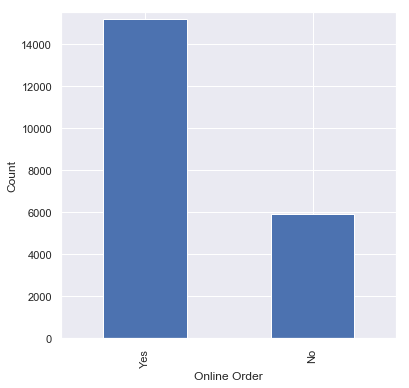

In [5]:
onlineOrderValueCount = zomato_df['online_order'].value_counts()
sns.set(rc={'figure.figsize':(6,6)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Count')
plt.xlabel('Online Order')
plt.show()

### Graph of customers who likes to do online reservations on Zomato

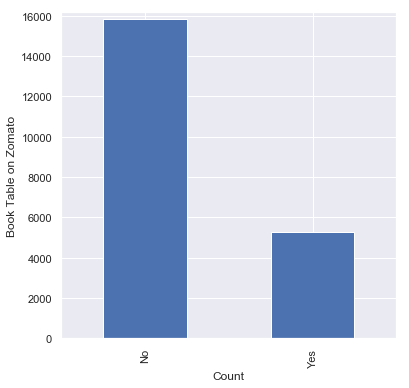

In [6]:
onlineOrderValueCount = zomato_df['book_table'].value_counts()
sns.set(rc={'figure.figsize':(6,6)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Book Table on Zomato')
plt.xlabel('Count')
plt.show()

### Graph of ratings of people vs count

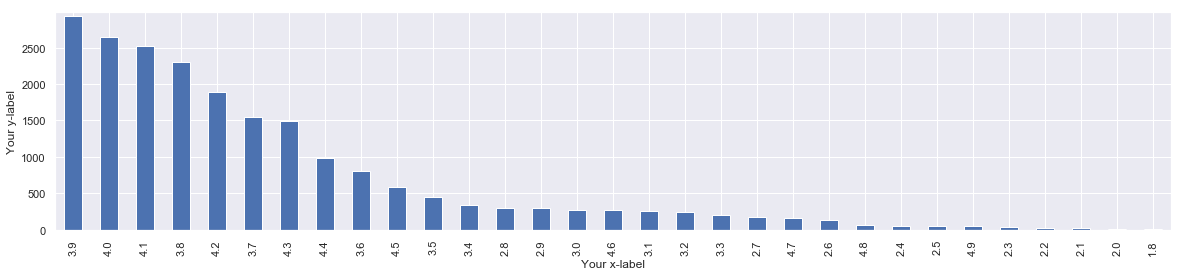

In [7]:
onlineOrderValueCount = zomato_df['rate'].value_counts()
sns.set(rc={'figure.figsize':(20,4)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Your y-label')
plt.xlabel('Your x-label')
plt.show()

### Graph of number of restaurants in a particular location

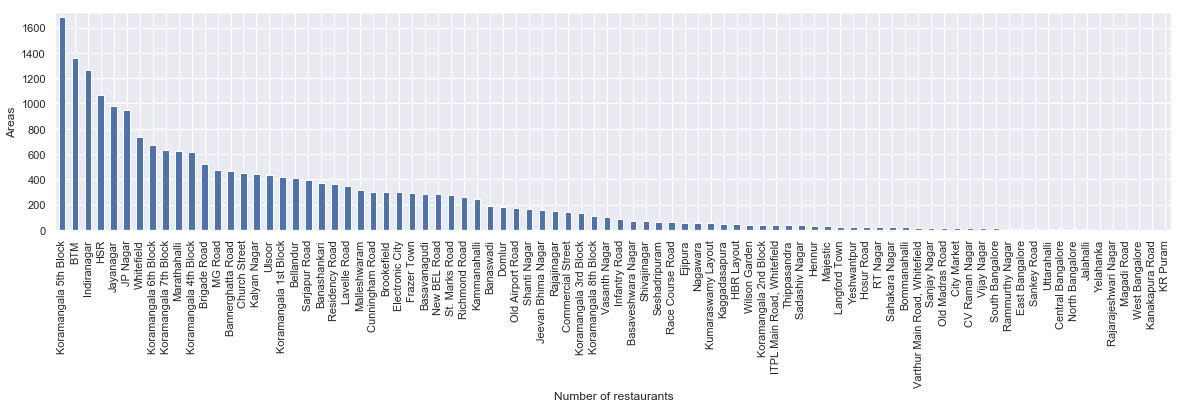

In [8]:
onlineOrderValueCount = zomato_df['location'].value_counts()
sns.set(rc={'figure.figsize':(20,4)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Areas')
plt.xlabel('Number of restaurants')
plt.show()

## Neighbourhood with the highest ratings and its characteristics 
<br> Q2 d) <br/> What is the neighborhood with the highest average rating? What are the majorcharacteristics of this neighborhood (e.g., type of restaurant, type of food they offer, etc)

<b> Ans: </b>For this purpose we cleaned the rate column by spliting it from '/' and taking the first part of array to get the actual rating of the restaurant. Then we group by the location and took the average of the rating value and sorted it in ascending order as shown in the code below. Using this we found out that restaurants in the location of 
Banashankari has the highest average rating and the characteristics of the area are:
<br>
<b>Cuisines in Banashankari are:</b> Rajasthani, Mughlai, Juices, Steak, Modern Indian, Finger Food, South Indian, Tex-Mex, Mexican, Japanese, North Indian, Italian, Thai, BBQ, Continental, Street Food, French, Spanish, Fast Food, Burger, European, Mediterranean, Beverages, Parsi, Kebab, Mangalorean, Sandwich, Ice Cream, Momos, Indonesian, Healthy Food, North Eastern, Asian, Desserts, Seafood, Chinese, Bakery, Salad, Pizza, Cafe
<br>
<b>Restaurants in Banashankari are:</b> Bar, Dessert Parlor, Irani Cafee, Pub, Microbrewery, Casual Dining, Quick Bites, Lounge, Kiosk, Bakery, Fine Dining, Beverage Shop, Cafe
<br>
The conclusions have been drawn using the following code


In [9]:
requiredColumns = ['location', 'rest_type', 'rate', 'cuisines', 'votes']
dataSetWithRatingsAndCities = pd.DataFrame(zomato_df[requiredColumns])

dataSetWithRatingsAndCities.head()

,location,rest_type,rate,cuisines,votes
0,Banashankari,Casual Dining,4.1,"North Indian, Mughlai, Chinese",775
1,Banashankari,Casual Dining,4.1,"Chinese, North Indian, Thai",787
2,Banashankari,"Cafe, Casual Dining",3.8,"Cafe, Mexican, Italian",918
3,Banashankari,Quick Bites,3.7,"South Indian, North Indian",88
4,Basavanagudi,Casual Dining,3.8,"North Indian, Rajasthani",166


### Calculating best overall rated location

In [10]:
meanRating = dataSetWithRatingsAndCities.groupby('location')['rate'].mean().sort_values(ascending=False)
best_rated_location = meanRating.keys()[0]
meanRating.head()

location
Lavelle Road             4.193410
Koramangala 5th Block    4.152875
St. Marks Road           4.140072
Cunningham Road          4.115232
Sankey Road              4.100000
Name: rate, dtype: float64

### Find all cuisines in best rated location

In [11]:
all_cuisines = []

dataSetWithRatingsAndCities[dataSetWithRatingsAndCities['location'] == best_rated_location]['cuisines'].apply(lambda x: all_cuisines.extend(x.split(', ')))
all_cuisines = list(set(all_cuisines)) # get unique cuisine values
print('All the cuisines served on top rating location are:', all_cuisines)

All the cuisines served on top rating location are: ['Pizza', 'Chinese', 'Steak', 'Modern Indian', 'European', 'North Indian', 'Juices', 'Desserts', 'Italian', 'Salad', 'Asian', 'Thai', 'Japanese', 'Mexican', 'Momos', 'Continental', 'Healthy Food', 'Parsi', 'Kebab', 'Spanish', 'Burger', 'Mediterranean', 'North Eastern', 'Cafe', 'Ice Cream', 'Bakery', 'Mangalorean', 'Mughlai', 'Fast Food', 'Rajasthani', 'Sandwich', 'South Indian', 'Beverages', 'BBQ', 'Street Food', 'French', 'Tex-Mex', 'Indonesian', 'Seafood', 'Finger Food']


### Find restaurant types in best rated location

In [12]:
all_rest_types = []
dataSetWithRatingsAndCities[dataSetWithRatingsAndCities['location'] == best_rated_location]['rest_type'].apply(lambda x: all_rest_types.extend(x.split(', ')))
all_rest_types = list(set(all_rest_types)) # get unique restaurant types only
print('All the restaurant types in top rating location are:', all_rest_types)

All the restaurant types in top rating location are: ['Bakery', 'Dessert Parlor', 'Fine Dining', 'Pub', 'Microbrewery', 'Casual Dining', 'Quick Bites', 'Lounge', 'Bar', 'Kiosk', 'Irani Cafee', 'Cafe', 'Beverage Shop']


# Predicting cost of two people in a restaurant

<b>Q3 a)</b> Explain what is the task you’re solving (e.g., supervised x unsupervised, classification xregression x clustering or similarity matching x etc) ?<br>
<b>A:</b> Since the problem statement involves predicting the price of the 2 people in a particular restaurant, it is a supervised learning where we have a target variable i.e to predict the cost and all other parameters are the input variables. Since its a supervised learning it is a regression problem since we were trying to predict the value of cost. If we were given a value of cost and we had to predict if the predicted cost would be greater or less than any particualar value then it would be a classification problem

<b>Q3 b)</b> What models will you choose? Why? <br>
<b>A:</b> Since the problem is a regression problem, we decide to use regressor models like tree Tree Regressor, SVM Regressor and Linear Regressor.

<b>Q3 b)</b> Which metrics will you use to evaluate your model? <br>
<b>A:</b> Since it's a regression problem, we would use mean square error method to determine the average error in each model used and using the matrics we find out the model with the least error to be the most efficient and use the prediction from that model as our final result. <br>
Since the problem is not a classification problem, we cannot use accuracy, f-measure, precision and recall for this problem statement.

<b>Q3 d)</b> How do you make sure not to overfit? <br>
<b>A:</b> In order to make sure that the data does not overfit on the model the following steps were taken:
<br>
<ul>
    <li><b>Genralizing the data correctly: </b>Certain instances like the cuisines those were separated by comma were removed and new records of the same were created leading to reduced sparcity and high genralization of the data</li>
    <li><b>Cross Validation of the data set: </b>Except for training and test data, a certain part of the dataset was taken as validation data and was also tested against to make sure that the data does not overfit.</li>
</ul>

<b>Q3 e)</b> Build your model and verify how it performs (using the metrics you have chosen inSection 3(c)) in your training data. Justify which evaluation approach you are using?(Out of sample validation or Cross-validation). Use a plot to justify your findings. How good is your model?
<br>


To solve this problem, we have considered 2 machine learning regressor i.e. Decision Tree Regressor and Linear Regressor. We split the data into training and test data set and fit the training data on the respective algorithms. We then predict the values using these model and use mean square error to determine the error in our models. 
<br>
To evaulate the data, we used cross validation for each approach and the implementation for each approach is shown below.
<br>
By applying these two models on the system, we find that we get a mean square error of 89 using Decision Tree Regressor and we get a mean square error of 480 for linear regressor. Hence we would prefer decision tree regresson algorithm over linear regression since we have a lower error rate for the same.
<br>
The above conclusion does make sense given the nature of the dataset as we find that multiple columns have multiple data that quickly branches out in leaves( i.e. table have unique records as analyzed in the tables above) and linear regressor woudn't apply on a non linear target column. Therefore, it makes sense to use decision tree regression over linear regresson.
<br>
The entire results are implemented in the following section

<b>Q3 f): </b>Test your model in your testing set and evaluate its performance.
<br>
<b>A: </b>To solve this problem we used decision tree regressor and linear regressor and got the following conclusion:
<ul>
    <li><b>Decision Tree Regressor:</b> Mean square error for test data is 86 and training data is 126. Since in decision tree, we are spliting the data into two parts at each node and for test data set we get a lower error rate since the data in the test data is more genralized as compare to training data which give slightly higher mean square error.</li>
    <li><b>Linear Regressor:</b> Mean square error for test data is 426 and training data is 426. It comes out to be almost same for both test and training data set because the data set is non-linear i.e some values are hight and some are very low. This trend is in both training and test data. Hence, we say that the linear regressor is not a well suited algorithm for this problem statement.</li>
</ul>

<b>Q3 f): </b>Can you tune your model to perform better? Explain the technique you’re using and justify why it is improving your results.
<br>
<b>A:</b> We use grid search to tune the parameter to obtain the better performance. When we apply grid search on the regressor, we obtain the hyperparameters that gives the best results. The entire process is explained in more details below.

### Using Cuisines Column For Label encoding and One Hot Encoding

In order to use the cuisines column effectively we observe that the column is separated by comma. One hot encoding the cuisines column would lead to a lot of redundant rows and would increase the sparsity of the data set. To reduce the sparcity we clean the cuisines column by spliting the comma separated values and creating new records for each and every cuisines. By using the shape method, we observe that number of rows have increased. The same has been implemented in the following code. 

In [13]:
X = zomato_df[['location', 'rate', 'rest_type', 'cuisines', 'approx_cost(for two people)']]
# Y = zomato_df['approx_cost(for two people)'].apply(lambda x: float(x.replace(',','')))
X[:20]

,location,rate,rest_type,cuisines,approx_cost(for two people)
0,Banashankari,4.1,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Banashankari,4.1,Casual Dining,"Chinese, North Indian, Thai",800
2,Banashankari,3.8,"Cafe, Casual Dining","Cafe, Mexican, Italian",800
3,Banashankari,3.7,Quick Bites,"South Indian, North Indian",300
4,Basavanagudi,3.8,Casual Dining,"North Indian, Rajasthani",600
5,Basavanagudi,3.8,Casual Dining,North Indian,600
7,Banashankari,4.6,"Casual Dining, Cafe","Pizza, Cafe, Italian",600
8,Banashankari,4.0,Cafe,"Cafe, Italian, Continental",700
9,Banashankari,4.2,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550
10,Banashankari,4.1,Cafe,Cafe,500


In [14]:
all_cuisines = []
all_rest_types = []

X['cuisines'].apply(lambda x: all_cuisines.extend(x.split(', ')))
X['rest_type'].apply(lambda x: all_rest_types.extend(x.split(', ')))

all_cuisines = list(set(all_cuisines))
all_rest_types = list(set(all_rest_types))
print(len(all_cuisines), len(all_rest_types))

97 21


In [15]:
list_X = []

def strech_data(x):
    multiple_cuisines = x['cuisines'].split(', ')
    multiple_rest_types = x['rest_type'].split(', ')
    for cusine in multiple_cuisines:
        for rest_type in multiple_rest_types:
            x['cuisines'] = cusine
            x['rest_type'] = rest_type
            list_X.append(x.tolist())
    return None
X.apply(lambda x: strech_data(x), axis=1)
len(list_X)

73445

In [16]:
streched_data = pd.DataFrame.from_records(list_X, columns=X.columns)
streched_data.head()
le = preprocessing.LabelEncoder()
encoded_X = streched_data[['location', 'rest_type', 'cuisines']].apply(le.fit_transform)
encoded_X['rate'] = streched_data['rate']
Y = streched_data['approx_cost(for two people)'].apply(lambda x: float(x.replace(',','')))
encoded_X.shape

(73445, 4)

In [17]:
Y.shape

(73445,)

### Decision Tree Regressor

In order to use the Decision Tree Regressor on our dataset, we started by splitting the data into test and training dataset where 20% is reserved for test data set. Then we apply the decision tree regressor and fit the regressor on our dataset as shown below. Then we calculate the mean square error for decision tree using training data and apply the same steps for test data. Since in mean square error, we are trying to estimate the risk i.e average square value of the value that is estimated and present, so we want that our mean square error to be close to zero.
<br>
Using the mean square error method for test data, we find that we get a value of 89.14 as shown below.

In [18]:
#spliting the dataset into test and training dataset 
X_train, X_test, y_train, y_test =  train_test_split(encoded_X, Y, test_size=0.2, random_state=42)
print('Train Shape:', X_train.shape, y_train.shape)
print('Test Shape:', X_test.shape, y_test.shape)

#using decision tree regressor and predicting the values
regr = DecisionTreeRegressor(random_state = 0)
# regr.fit(encoded_X, Y)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

#using mean square method to determine how effecient the algorithm is
print("Mean squre error for Decision tree regressor using test data is: ",np.sqrt(mean_squared_error(y_test, y_pred)))

#Similarly applying the same for test data set and finding the mean square error
regr = DecisionTreeRegressor(random_state = 0)
regr.fit(X_test,y_test)
y_pred = regr.predict(X_test)
print("Mean squre error for Decision tree regressor using train data is: ",np.sqrt(mean_squared_error(y_test, y_pred)))


Train Shape: (58756, 4) (58756,)
Test Shape: (14689, 4) (14689,)
Mean squre error for Decision tree regressor using test data is:  126.66034781053054
Mean squre error for Decision tree regressor using train data is:  89.14345058951592


Now, inorder to make our results better and figure out which parameter would yield a lower mean square error, we need to use grid search for this purpose. Where we specify various conditions and apply grid search and try to fit the grid search on the existing conditions that we specify to get the best hyperparameters.

In [19]:
#hypertuning with grid search
param_grid = {"criterion": ["mse"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


decision_tree_grid_search = GridSearchCV(regr, param_grid, cv=5)
decision_tree_grid_search.fit(encoded_X[:10000], Y[:10000])
print("Best Hyperparameters:\n{}".format(decision_tree_grid_search.best_params_))

Best Hyperparameters:
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


Now we have obtained our hyperparameters. First we will print the grid search to understand the time taken to calculate the score and then we will plot the graph to determine the depth and mean test score for the results obtained by decision tree grid search we applied above.

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006250      0.007654         0.006251        0.007655   
1       0.006251      0.007655         0.000000        0.000000   
2       0.006258      0.007665         0.000000        0.000000   
3       0.000000      0.000000         0.003131        0.006262   
4       0.006255      0.007661         0.000000        0.000000   

  param_criterion param_max_depth param_max_leaf_nodes param_min_samples_leaf  \
0             mse               2                    5                     20   
1             mse               2                    5                     20   
2             mse               2                    5                     20   
3             mse               2                    5                     40   
4             mse               2                    5                     40   

  param_min_samples_split                                             params  \
0                      10  {'c

C:\Users\navne\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\navne\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\navne\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\navne\Anaconda3\lib\site-packages\sklearn\util

[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

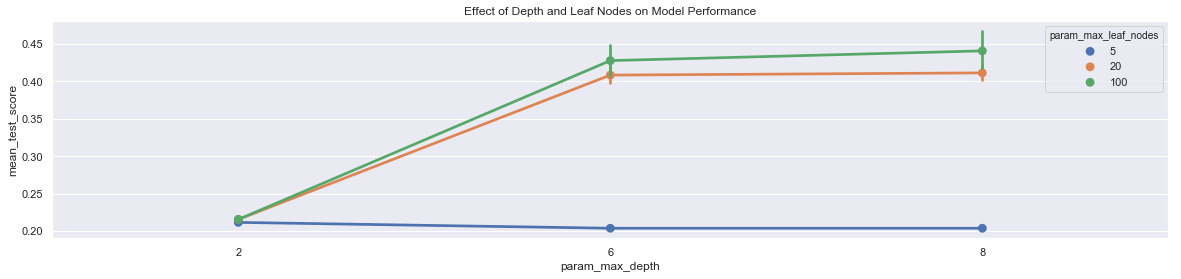

In [20]:
#printing dataframe with grid search results
df = pd.DataFrame(data=decision_tree_grid_search.cv_results_)
print(df.head())

#plotting graph for each notes to study the behaviour 
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

From the above graph we are able to determine the relatioin between depth of the parameter and mean test scores we obtained. We observe that when leaf nodes are 5, we obtain a mean test score of 0.15 when the depth of the tree is 2. However, if we increase the depth of the tree for the same parameters the mean test score does not improve. However, if we increase the leaf nodes and increase the max depth we see that our mean test score is increased showing that our test score is also increased with an increase in depth and leaf nodes.
<br>
Next we apply cross validation to make sure that our model is not over fitted as shown below.

In [21]:
#cross validation to check the training model score
print("Cross validation for training model score is ",cross_val_score(decision_tree_grid_search.best_estimator_, encoded_X, Y, cv=10,scoring='neg_mean_squared_error'))

#cross validation to check the test model score
predicted = decision_tree_grid_search.best_estimator_.predict(X_test)
print("Mean Square Error for test data after using the best parameters is : %.2f" % metrics.mean_squared_error(y_test, y_pred))

Cross validation for training model score is  [ -64534.2874595   -71723.95358448  -94131.22711147  -75215.99044132
  -55473.5530589   -52391.0170826   -54626.08502423  -89093.64165413
  -95121.54472595 -107587.31973892]
Mean Square Error for test data after using the best parameters is : 7946.55


Using the above cross validation scores available for training data, we select the one closest to zero and use that to calculate our mean square error for test data.

### Linear Regressor

In order to use the Linear Regressor on our dataset, we started by splitting the data into test and training dataset where 20% is reserved for test data set. Then we apply the linear regressor and fit the regressor on our dataset as shown below. Then we calculate the mean square error for decision tree using training data and apply the same steps for test data. Since in mean square error, we are trying to estimate the risk i.e average square value of the value that is estimated and present, so we want that our mean square error to be close to zero.
Using the mean square error method for test data, we find that we get a value of 426.36 as shown below.

In [22]:
#splitting the dataset into training and test data
X_train, X_test, y_train, y_test =  train_test_split(encoded_X, Y, test_size=0.2, random_state=42)
print('Train Shape:', X_train.shape, y_train.shape)
print('Test Shape:', X_test.shape, y_test.shape)

#using linear regressor and predicting the values
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#using mean square method to determine how effecient the algorithm is
print("Mean squre error for Linear regressor using test data is: ",np.sqrt(mean_squared_error(y_test, y_pred)))

#Similarly applying the same for test data set and finding the mean square error
regr = LinearRegression()
regr.fit(X_test,y_test)
y_pred = regr.predict(X_test)
print("Mean squre error for Linear regressor using train data is: ",np.sqrt(mean_squared_error(y_test, y_pred)))


Train Shape: (58756, 4) (58756,)
Test Shape: (14689, 4) (14689,)
Mean squre error for Linear regressor using test data is:  426.3997167546589
Mean squre error for Linear regressor using train data is:  426.36966557763185


Now, we have the mean square as very high showing that it is not a very effiecient model to use. So, we need to hypertune grid search and find out the best params and best score that can be achieved using those params. 
<br>
The entire process is shown below.

In [33]:
#hypertuning with grid search
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

regr = LinearRegression()
regr_gs = GridSearchCV(regr, param_grid, cv=3)
regr_gs_fit = regr_gs.fit(X_train, y_train)
print("Best Params", regr_gs_fit.best_params_)
print("Best Score", regr_gs_fit.best_score_)

Best Params {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Best Score 0.2040305550223681


Now we have the best parameters and score we need to use cross validation to make sure that the model is not overfitted. We cross validate training model and using the best parameters we estimate the mean square error as shown below.

In [36]:
#cross validation to check the training model score
print("Cross validation for training model score is ",cross_val_score(regr_gs_fit, X_test, y_test, cv=10,scoring='neg_mean_squared_error'))

#cross validation to check the test model score
predicted = regr_gs.best_estimator_.predict(X_test)
print("Predicted value ",predicted)
print("Mean Square Error for test data after using the best parameters is : %.2f" % metrics.mean_squared_error(y_test, predicted))

Cross validation for training model score is  [-174936.12091329 -182793.88956431 -177580.4915505  -175230.644533
 -161699.08578327 -183559.34231286 -183672.13445556 -204046.48347237
 -181798.63401493 -193888.05100535]
Predicted value  [ 93.92589144 479.34858714 519.25110862 ... 921.81319159 964.83769622
 896.09282083]
Mean Square Error for test data after using the best parameters is : 181816.72
